In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab02.ok')

Assignment: lab02
OK, version v1.13.11



## Lab 2: Pandas Overview

**This assignment should be completed by Wednesday January 30, 2019 at 11:59 PM.**

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (i.e. selecting rows and columns)
* Filtering data (using boolean arrays)

In this lab you are going to use several pandas methods, such as `drop` and `loc`. You may press `shift+tab` on the method parameters to see the documentation for that method. If you are familar with the `datascience` library used in Data 8, this [conversion notebook](https://github.com/data-8/materials-x19/blob/master/reference/Datascience%20to%20Pandas%20Conversion%20Notebook.ipynb) may serve as a useful guide.

**Note**: The Pandas interface is notoriously confusing, and the documentation is not consistently great. Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The pandas `DataFrame` class ([docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) provides at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [3]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [4]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

,color,fruit
0,red,apple
1,orange,orange
2,yellow,banana
3,pink,raspberry


You can obtain the dimensions of a dataframe by using the shape attribute dataframe.shape

In [5]:
fruit_info.shape

(4, 2)

You can also convert the entire dataframe into a two-dimensional numpy array.

In [6]:
fruit_info.values

array([['apple', 'red'],
       ['orange', 'orange'],
       ['banana', 'yellow'],
       ['raspberry', 'pink']], dtype=object)

### Question 1(a)

For a DataFrame `d`, you can add a column by `d['new column name'] = ...` and assigning a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). 

<!--
BEGIN QUESTION
name: q1a
-->

In [7]:
fruit_info['rank1']=[2,3,4,1]
fruit_info

,fruit,color,rank1
0,apple,red,2
1,orange,orange,3
2,banana,yellow,4
3,raspberry,pink,1


In [8]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1(b)

You can also add a column to `d` by `d.loc[:, 'new column name'] = ...`. This way to modify an existing dataframe is faster and therefore preferred over the assignment syntax above. We will explain in more detail what `loc[]` does, but essentially the first parameter is for the rows and second is for columns. The `:` means change all rows and the `new column name` indicates the index value of the column you are modifying (or in this case, adding). 

Add a column called `rank2` to the `fruit_info` table which contains the same values in the same order as the `rank1` column.

<!--
BEGIN QUESTION
name: q1b
-->

In [9]:
fruit_info.loc[:, 'rank2']=[2,3,4,1]
fruit_info

,fruit,color,rank1,rank2
0,apple,red,2,2
1,orange,orange,3,3
2,banana,yellow,4,4
3,raspberry,pink,1,1


In [10]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) the both the `rank1` and `rank2` columns you created. (Make sure to use the `axis` parameter correctly.) Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

*Hint*: Look through the documentation to see how you can drop multiple columns of a Pandas dataframe at once using a list of column names.

<!--
BEGIN QUESTION
name: q2
-->

In [19]:
fruit_info_original = fruit_info.drop(columns=['rank1', 'rank2'])
fruit_info_original

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [20]:
ok.grade("q2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with capital letters. Set the `inplace` parameter correctly to change the `fruit_info_original` dataframe. 

<!--
BEGIN QUESTION
name: q3
-->

In [22]:
fruit_info_original.rename(columns={'fruit': 'Fruit', 'color': 'Color'}, inplace=True)
fruit_info_original

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [23]:
ok.grade("q3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Babyname datasets
Now that we have learned the basics, let's move on to the babynames dataset. The babynames dataset contains a record of the given names of babies born in the United States each year.

First let's run the following cells to build the dataframe `baby_names`.
The cells below download the data from the web and extract the data into a dataframe. There should be a total of 5933561 records.

### `fetch_and_cache` Helper

The following function downloads and caches data in the `data/` directory and returns the `Path` to the downloaded file. The cell below the function describes how it works. 

In [24]:
import requests
from pathlib import Path

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path to the file.
    """
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        created = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded at", created)
    return file_path

In Python, a `Path` object represents the filesystem paths to files (and other resources). The `pathlib` module is effective for writing code that works on different operating systems and filesystems. 

To check if a file exists at a path, use `.exists()`. To create a directory for a path, use `.mkdir()`. To remove a file that might be a [symbolic link](https://en.wikipedia.org/wiki/Symbolic_link), use `.unlink()`. 

This function creates a path to a directory that will contain data files. It ensures that the directory exists (which is required to write files in that directory), then proceeds to download the file based on its URL.

The benefit of this function is that not only can you force when you want a new file to be downloaded using the `force` parameter, but in cases when you don't need the file to be re-downloaded, you can use the cached version and save download time.

Below we use `fetch_and_cache` to download the `namesbystate.zip` zip file, which is a compressed directory of CSV files. 

**This might take a little while! Consider stretching.**

In [25]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Downloading... Done!


*Optional Hacking Challenge:* Use the `zipfile` module, `pd.read_csv`, and `pd.concat` to build a single dateframe called `baby_names` containing all of the data from each state with the `column_labels` below. a `ZipFile` object has an attribute `filelist` and a method `open`. Each `.TXT` file inside `namesbystate.zip` is a CSV file for the names of babies born in one state.

If you don't want to figure out how to read a zip file, you can just scroll down and use the cell where we've done it for you.

In [21]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

...

The following cell builds the final full `baby_names` DataFrame. It first builds one dataframe per state, because that's how the data are stored in the zip file. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 

In [26]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = states[0]
for state_df in states[1:]:
    baby_names = pd.concat([baby_names, state_df])
baby_names = baby_names.reset_index().iloc[:, 1:]

In [27]:
len(baby_names)

5933561

In [28]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


## Slicing Data Frames - selecting rows and columns


### Selection Using Label/Index (using loc)

**Column Selection** 
To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage looks like `df.loc[rowname,colname]`. (Reminder that the colon `:` means "everything").  For example, if we want the `color` column of the `ex` data frame, we would use : `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would give select the columns `Name` and the columns after.

- *Alternative:* While `.loc` is invaluable when writing production code, it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `df['colname']`.

**Row Selection**
Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [29]:
#Example:
baby_names.loc[2:5, 'Name']

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [30]:
#Example:  Notice the difference between these two methods
baby_names.loc[2:5, ['Name']]

,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


### Selection using Integer location (using iloc)

There is another Pandas slicing function called `iloc[]` which lets you slice the dataframe by row position and column position instead of by row index and column label (for `loc[]`). This is really the main difference between the 2 functions and it is **important** that you remember the difference and why you might want to use one over the other. In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

Below, we have sorted the `baby_names` dataframe. Notice how the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 1. This distinction is important in understanding the different between `loc[]` and `iloc[]`.

In [31]:
sorted_baby_names = baby_names.sort_values(by=['Name'])
sorted_baby_names.head()

,State,Sex,Year,Name,Count
4054335,NY,M,2013,Aaban,6
4056416,NY,M,2014,Aaban,6
738931,CA,M,2014,Aadan,5
724056,CA,M,2009,Aadan,6
5310055,TX,M,2008,Aadan,5


Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting `baby_names` by name.

In [32]:
sorted_baby_names.iloc[1:4, 3]

4056416    Aaban
738931     Aadan
724056     Aadan
Name: Name, dtype: object

Notice that using `loc[]` with 1:4 gives different results, since it selects using the *index*.

In [33]:
sorted_baby_names.loc[1:4, "Name"]

1          Annie
2462733    Annie
4897609    Annie
4510678    Annie
1223477    Annie
1655310    Annie
2208015    Annie
3352224    Annie
270845     Annie
5021622    Annie
4492006    Annie
207        Annie
3537243    Annie
32966      Annie
1602899    Annie
3463553    Annie
1717136    Annie
2935277    Annie
378009     Annie
508508     Annie
937302     Annie
5599540    Annie
86154      Annie
2594053    Annie
1237121    Annie
4691232    Annie
857095     Annie
4478590    Annie
4859754    Annie
2779581    Annie
           ...  
879077     Helen
4375062    Helen
3528888    Helen
2465135    Helen
2776862    Helen
1557305    Helen
4392338    Helen
1055936    Helen
9513       Helen
42755      Helen
3352505    Helen
2188931    Helen
39         Helen
4081489    Helen
5447175    Helen
4392722    Helen
4496771    Helen
2194927    Helen
2491875    Helen
3471622    Helen
3143432    Helen
4263926    Helen
13         Helen
3835120    Helen
1974123    Helen
1258622    Helen
878737     Helen
4657484    Hel

Lastly, we can change the index of a dataframe using the `set_index` method.

In [34]:
#Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [35]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [38]:
#Example: 
#df.loc[2:5,"Year"] You can't do this
df.iloc[1:4,2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


### Question 4

Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

<!--
BEGIN QUESTION
name: q4
-->

In [39]:
name_and_year = baby_names.loc[:,['Name', 'Year']]
name_and_year[:5]

,Name,Year
0,Mary,1910
1,Annie,1910
2,Anna,1910
3,Margaret,1910
4,Helen,1910


In [40]:
ok.grade("q4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Note that `.loc[]` can be used to re-order the columns within a dataframe.

## Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df['column name'] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in California

In [46]:
ca = baby_names[baby_names['State'] == 'CA']
ca = baby_names[baby_names.loc[:,'State'] == 'CA']
ca.head()

,State,Sex,Year,Name,Count
373417,CA,F,1910,Mary,295
373418,CA,F,1910,Helen,239
373419,CA,F,1910,Dorothy,220
373420,CA,F,1910,Margaret,163
373421,CA,F,1910,Frances,134


### Question 5
Select the names in Year 2000 (for all baby_names) that have larger than 3000 counts. What do you notice?

(If you use `p & q` to filter the dataframe, make sure to use `df[df[(p) & (q)]]` or `df.loc[df[(p) & (q)]])`

**Remember** that both slicing and `loc` will achieve the same result, it is just that `loc` is typically faster in production. You are free to use whichever one you would like.

<!--
BEGIN QUESTION
name: q5
-->

In [47]:
result = baby_names.loc[(baby_names.loc[:,'Year']==2000) & (baby_names.loc[:,'Count']>3000)]
result.head()

,State,Sex,Year,Name,Count
697386,CA,M,2000,Daniel,4339
697387,CA,M,2000,Anthony,3838
697388,CA,M,2000,Jose,3803
697389,CA,M,2000,Andrew,3600
697390,CA,M,2000,Michael,3571


In [48]:
ok.grade("q5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6

Some names gain/lose popularity because of cultural phenomena such as a political figure coming to power. Below, we plot the popularity of the name Hillary over time. What do you notice about this plot? What might be the cause of the steep drop?

<!--
BEGIN QUESTION
name: q6
-->

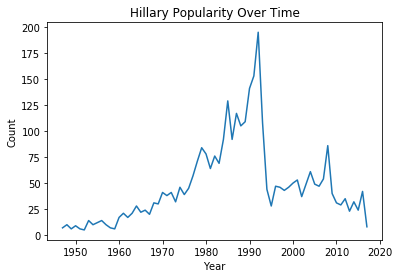

In [49]:
hillary_baby_name = baby_names[(baby_names['Name'] == 'Hillary') & (baby_names['State'] == 'CA') &(baby_names['Sex'] == 'F')]
plt.plot(hillary_baby_name['Year'], hillary_baby_name['Count'])
plt.title("Hillary Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

Before the year 1992, the number of female babies using 'Hillary' as their names in CA increased by year, roughly. However, the number decreased steeply from 1992 to 1995 and the trend after 1992 till 2017 is descreasing rather than increasing.
The possible reason is that Hillary Clinton actively played a political role around 1992 and becase famous. Probably, people tended to avoid their babies' names to be repeated. Therefore, more people tried to not use the name 'Hillary' for their babies.

In [50]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab02.ipynb'.
Submit... 100% complete
Submission successful for user: tanjin_he@berkeley.edu
URL: https://okpy.org/cal/data100/sp19/lab2/submissions/xvZ9Pn

